
[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\LENOVO\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\LENOVO\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\LENOVO\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


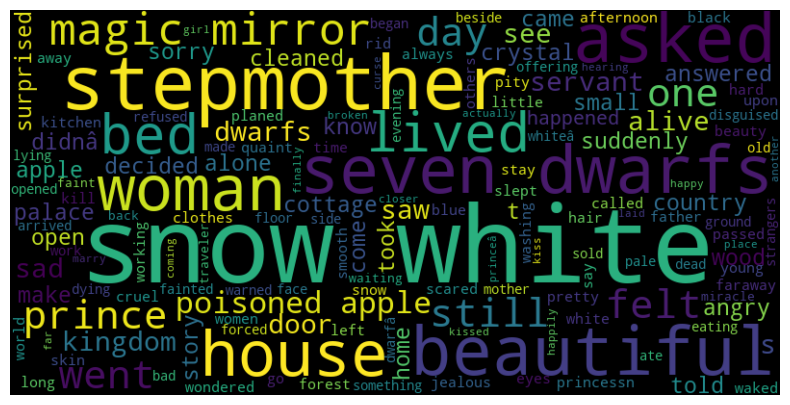

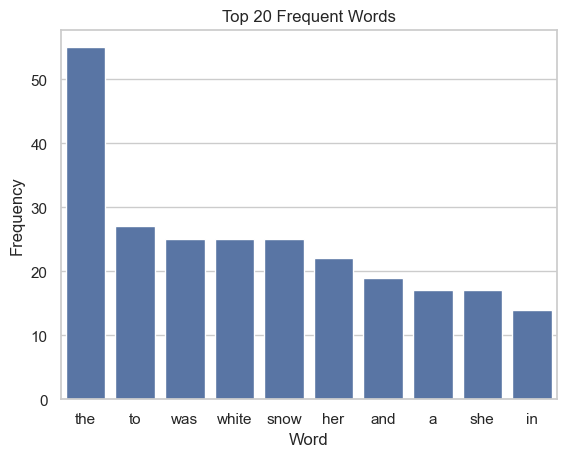

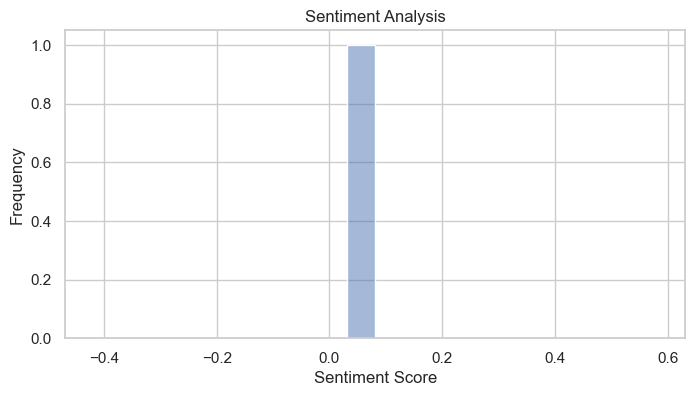

In [24]:
!pip install requests beautifulsoup4 nltk wordcloud matplotlib textblob
!pip install pandas
!pip install seaborn

import requests
from bs4 import BeautifulSoup
import re
import string
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob

url = 'https://shared.djambred.my.id/uas-nim-genap.txt'
response = requests.get(url)
text = response.text

# Remove HTML tags
text = re.sub(r'<.*?>', '', text)

# Remove punctuations and convert to lowercase
text = text.translate(str.maketrans('', '', string.punctuation)).lower()

# Tokenize the text
tokens = word_tokenize(text)

# Remove stopwords
stop_words = set(stopwords.words('indonesian'))
tokens = [word for word in tokens if word not in stop_words]

# Join the tokens back into a string
text = ' '.join(tokens)

wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

freq_dist = nltk.FreqDist(tokens)
top_words = pd.DataFrame(freq_dist.most_common(10), columns=['Word', 'Frequency'])
sns.set(style='whitegrid')
sns.barplot(x='Word', y='Frequency', data=top_words)
plt.title('Top 20 Frequent Words')
plt.show()

sentiment_scores = []
for sentence in nltk.sent_tokenize(text):
    blob = TextBlob(sentence)
    sentiment_scores.append(blob.sentiment.polarity)

sentiment_df = pd.DataFrame(sentiment_scores, columns=['Sentiment Score'])
plt.figure(figsize=(8, 4))
sns.histplot(x=sentiment_df['Sentiment Score'], kde=True, bins=20)
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()